# Chapter 21 - Deep Learning

*In which gradient descent learns multistep programs, with significant implications for the
major subfields of artificial intelligence.* - AI: A Modern Approach

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch21_deep_learning/DALL%C2%B7E%202024-03-20%2022.57.56%20-%20A%20complex%2C%20intricate%20illustration%20of%20a%20neural%20network%2C%20showcasing%20a%20vast%20array%20of%20interconnected%20nodes%20and%20layers.%20The%20nodes%20are%20depicted%20as%20glowing%20p.webp" width="400"   >

## - **Introduction** 
- Deep learning is a subset of machine learning that utilizes complex algebraic circuits, structured in many layers, allowing for elaborate computation paths from inputs to outputs. This multi-layered approach is what the term "deep" refers to.
- It is the preferred methodology for numerous applications, including visual object recognition, machine translation, speech recognition and synthesis, image synthesis, and is significant in reinforcement learning.
- Originating from attempts to model the brain's neural networks in the early 1940s, the term "neural networks" in deep learning is used despite the superficial similarity to actual neural structures.
- Deep learning offers self-evident advantages over some older methods, especially for handling high-dimensional data like images. Traditional methods like linear and logistic regression are limited in expressive power, being able to represent only linear functions and boundaries.
- Unlike decision trees, which only allow for complex interactions between inputs in a small fraction of cases and require exponential growth for broader application, deep learning trains circuits for long computation paths. This allows all input variables to interact in complex ways, capturing the complexity of real-world data for various learning problems.
- The chapter outlines start with simple feedforward networks and the basics of learning in these networks, progressing through more complex structures like convolutional neural networks for vision applications, and covering algorithms for training networks, improving generalization, and recurrent network structures suited for sequential data. It also explores deep learning applications beyond supervised learning, summarizing the field's wide applicational range.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch21_deep_learning/fig21_1.jpg?raw=true" width="500">

## **21.1 Simple Feedforward Networks** 
- Feedforward networks are structured as directed acyclic graphs, with information flowing in one direction from input to output nodes, avoiding any loops.
- They contrast with recurrent networks, which reintroduce outputs back into the system as inputs, creating a dynamical system with internal states or memory. Recurrent networks are discussed further in Section 21.6.
- An example of feedforward networks is Boolean circuits, which operate on binary inputs to produce binary outputs, implementing Boolean functions where each node performs a simple operation based on its inputs.
- Unlike Boolean circuits, neural networks in deep learning handle continuous input and output values. Nodes in these networks process continuous inputs and can adjust their parameters (part of the network's learning process) to better fit the training data, moving beyond the binary constraints of Boolean logic to accommodate a wider range of complex functions.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/440px-Neural_network_example.svg.png" width="400">

### - **21.1.1 Networks as Complex Functions** 
- Networks are composed of units (nodes) that calculate the weighted sum of inputs from predecessor nodes and apply a nonlinear activation function to produce an output.
- The inclusion of a dummy input fixed at +1 allows for a nonzero total weighted input to a unit, even if preceding outputs are zero, enabling the network to accommodate biases.
- The nonlinearity of activation functions is crucial, enabling networks to represent complex, non-linear functions. The universal approximation theorem demonstrates that networks with a nonlinear and a linear layer can approximate any continuous function to any degree of accuracy.
- Common activation functions include the sigmoid (logistic function), ReLU (rectified linear unit), softplus (a smooth version of ReLU), and tanh (tangent hyperbolic), each with unique characteristics and effects on the network's behavior.
- The arrangement of units into a network creates a complex function, represented algebraically and parameterized by weights, mapping input vectors to output values. The internal network structure directly influences the form of this function.
- Networks can be conceptualized as computation graphs or dataflow graphs, where each node represents an elementary computation, highlighting the process from inputs through weights to outputs. Weights act as adjustable parameters, fine-tuning the network's accuracy in matching training data.
- The computation graph approach simplifies the representation of the network's operation, highlighting the layered structure and the sequence of computations from inputs to the final output.
- The discussion underscores the importance of network connectivity and the role of activation functions in enabling deep learning networks to fit complex data patterns effectively.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch21_deep_learning/fig21_2_activation.jpg?raw=true" width="500">

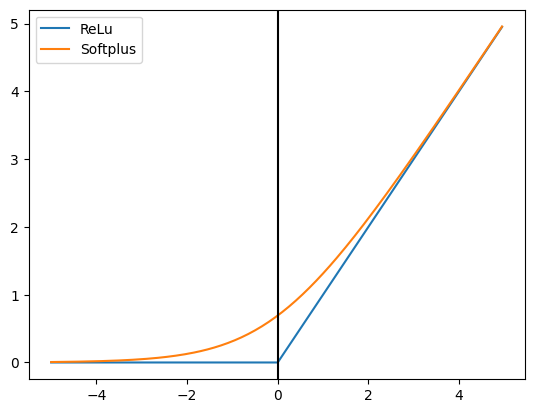

In [4]:
# ReLu function 
# ReLU (Rectified Linear Unit) is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
import numpy as np
import matplotlib.pyplot as plt


def ReLu(x):
    return np.maximum(0, x)

# softplus function
# f(x) = ln(1 + e^x)
def softplus(x):
    return np.log(1 + np.exp(x)) # ln(1 + e^x)

x = np.arange(-5, 5, 0.05)
y1 = ReLu(x)
y2 = softplus(x)
# plot it
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['ReLu', 'Softplus'])
# show vertical line through 0
plt.axvline(x=0, color='k')
plt.show()

In [6]:
# let's do a simple gradient descent example with 1 dimensional data
# we will use the ReLu function
# we will use the derivative of the ReLu function to update the weights
# we will use the mean squared error as the loss function
# we will use the derivative of the loss function to update the weights
# we will use the chain rule to calculate the derivative of the loss function with respect to the weights

# generate some data
np.random.seed(0)
X = np.random.randn(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# initialize weights
w = np.random.randn(1, 1)
b = np.random.randn(1, 1)

# learning rate
alpha = 0.01

# number of epochs
epochs = 100

# gradient descent
for i in range(epochs):
    # forward pass
    z = np.dot(X, w) + b
    a = ReLu(z)
    # loss function
    loss = np.mean((y - a) ** 2)
    # backward pass
    dz = -2 * (y - a)
    dw = np.mean(X * dz, axis=0)
    db = np.mean(dz)
    # update weights
    w -= alpha * dw.reshape(1, 1)
    b -= alpha * db
    if i % 10 == 0:
        print(f'Epoch {i + 1}/{epochs}, Loss: {loss}')

Epoch 1/100, Loss: 7.328145279698183
Epoch 11/100, Loss: 6.7946645309710405
Epoch 21/100, Loss: 5.082191813652214
Epoch 31/100, Loss: 3.9653075737335564
Epoch 41/100, Loss: 3.2436011173227826
Epoch 51/100, Loss: 2.7827626106265524
Epoch 61/100, Loss: 2.4936844219374117
Epoch 71/100, Loss: 2.317290366768363
Epoch 81/100, Loss: 2.2164197361964866
Epoch 91/100, Loss: 2.166332794172431


### Similarities with Newton's Method

- The process of training a neural network is similar to Newton's method for finding the roots of a function. Newton's method iteratively refines an initial guess for a root by approximating the function with a tangent line at the current guess, then finding the x-intercept of the tangent line as the next guess.

### 21.1.2 Gradients and Learning** 
- The concept of learning in deep neural networks involves applying gradient descent to adjust weights based on the gradient of the loss function, which measures the difference between the network's predictions and the actual data.
- The process for calculating gradients for weights in both the output and hidden layers involves calculus tools, particularly the chain rule, to relate changes in weights to changes in the loss function.
- A squared loss function (L2) is used for simplicity to illustrate how gradients are computed for individual weights within the network, focusing on the contribution of each weight to the prediction error.
- For weights directly connected to the output layer, the gradient calculation is straightforward, involving the derivative of the loss with respect to that weight. For weights in hidden layers, the calculation requires applying the chain rule multiple times to trace the impact of these weights through the network layers to the output.
- The concept of "perceived error" is introduced, showing how errors propagate back through the network. This is the basis for the back-propagation method, where the error at the output is used to adjust weights throughout the network by calculating gradients in a way that accounts for the role of each weight in the error.
- The expressions for gradients involve local derivatives of activation functions, which can be very small or even zero for certain inputs, leading to the vanishing gradient problem. This issue makes it hard for networks, especially deep ones, to learn, as the error signal diminishes in earlier layers.
- The computation of gradients aligns with the structure of the feedforward computation graph, simplifying the gradient calculation process across different network configurations.
- Automatic differentiation is highlighted as a crucial tool that simplifies the learning process by systematically applying differentiation rules to compute gradients for any network structure, thereby avoiding manual calculus work for each new network design.
- Major deep learning frameworks offer automatic differentiation, facilitating experimentation with various network architectures, activation functions, and loss functions without manual gradient calculations. This supports the end-to-end learning approach, where complex systems are trained as a whole, leveraging trainable subsystems without predefined knowledge of each subsystem's specific contributions to the overall task.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch21_deep_learning/fig21_3_neural_network.jpg?raw=true" width="500">

## **21.2 Computation Graphs for Deep Learning** 
- Deep learning is characterized by representing hypotheses through computation graphs, where each graph has tunable weights. These weights are adjusted based on the gradient of the loss function to best fit the training data. 
- The construction of computation graphs begins with the input layer, which encodes the training or test data (denoted by xxx) as values in the input nodes. 
- Attention then shifts to the output layer, where the predicted outputs (y^\hat{y}y^​) are evaluated against the actual values (yyy). This comparison generates a learning signal used for tuning the network's weights to reduce prediction error.
- Between the input and output layers lie the hidden layers, which play a crucial role in processing and transforming the input data into a form that can be mapped to the output layer, allowing the network to learn complex patterns and relationships within the data.

### - **21.2.1 Input Encoding**
  - Input and output nodes directly connect to input data (x) and output data (y).
  - For Boolean attributes, false and true are usually encoded as 0 and 1, respectively, but sometimes as -1 and +1.
  - Numeric attributes are used as is but may be scaled or mapped onto a log scale if their magnitudes vary significantly.
  - RGB images, considered as 3XY integer-valued attributes, don't fit neatly into the category of factored data due to the importance of pixel adjacency, which is lost in fully connected layers. Networks used for image data often have array-like internal structures to reflect adjacency semantics.
  - Categorical attributes with more than two values are encoded using one-hot encoding, where each possible value is represented by a separate input bit set to 1, with all others set to 0. This approach is preferred over using integers to avoid imparting unintended ordinal relationships among the categories.

In [9]:
# some scaling example
# we can scale everyting to be between 0 and 1
# we can use the sigmoid function to do this
# the sigmoid function is defined as f(x) = 1 / (1 + e^-x)
# something simpler might be just to divide by the maximum value
# simple scaling might not be sufficient when data is not normally distributed
# which could be the case for some features in the data
# we can use log scaling to make the data more normally distributed
# we can use the log function to do this
# the log function is defined as f(x) = log(x)
# let's see these in action
# let's get some data in range -50 to 50
X = np.random.randint(-50, 50, 10)
# scale it between 0 and 1
X_scaled = X / np.max(X) # here the range will be between -1 and 1, which might not be allowed in the model
print(X_scaled)
# also note that we did not check np.min(X) to see if it is negative
# we could have shifted the data to be positive by adding the minimum value
X_scaled = (X - np.min(X)) / (np.max(X) - np.min(X))  
print(X_scaled)
# we could have done this immediately by using the MinMaxScaler from sklearn in real life
X_scaled = (X + np.abs(np.min(X))) / (np.max(X) + np.abs(np.min(X)))
print(X_scaled)
# so you can see the scaling was exactly the same for last two methods

[ 0.16216216 -0.72972973 -0.7027027  -1.24324324 -0.02702703  1.
 -0.54054054  0.10810811 -0.67567568 -0.81081081]
[0.62650602 0.22891566 0.24096386 0.         0.54216867 1.
 0.31325301 0.60240964 0.25301205 0.19277108]
[0.62650602 0.22891566 0.24096386 0.         0.54216867 1.
 0.31325301 0.60240964 0.25301205 0.19277108]


In [13]:
# so now let's do log scaling
# first we need some values from 1 to 5 billion
# X = np.random.randint(1, 2_000_000_000, 20) # limit for int32 is 2_147_483_647 or 2^31 - 1
# let's get numbers distributed between 0 and 5 billion
X = np.random.rand(20) * 5_000_000_000
print(X)
# scale it using log scaling
X_scaled = np.log(X)
print(X_scaled)
# then you can scale the log to 0 and 1

[3.87609889e+09 4.63106465e+09 1.62655153e+09 4.76435336e+09
 6.97419797e+07 2.66732841e+09 1.52291015e+09 4.41429999e+09
 1.25311360e+09 3.38705915e+09 4.05212046e+09 2.16074025e+09
 3.76067260e+09 4.14801124e+09 1.89516886e+09 4.82748049e+08
 1.28069789e+09 2.95967579e+09 2.38238600e+09 2.43967284e+09]
[22.07809504 22.25605262 21.20972798 22.28442766 18.06031299 21.70434321
 21.14388892 22.20811511 20.94889717 21.94322787 22.12250615 21.49371671
 22.04786366 22.14589484 21.36257378 19.99500544 20.97067099 21.80834557
 21.59136834 21.61512979]


In [14]:
# let's see on hot encoding in action
# we have a list of categories
categories = ['cat', 'dog', 'bird', 'fish', 'dinosaur']
# we can convert this into one hot encoding
# first we need to get the unique values
unique_values = np.unique(categories)
print(unique_values)
# then we can create a zero matrix with the shape of the number of categories
one_hot = np.zeros((len(categories), len(unique_values)))
print(one_hot)

['bird' 'cat' 'dinosaur' 'dog' 'fish']
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [16]:
# now let's encode some values
# my sample features
features = ['cat', 'dog', 'bird', 'fish', 'dinosaur', 'cat', 'dog', 'bird', 'fish', 'dinosaur']
one_hot = np.zeros((len(features), len(unique_values)))
# let's encode these features
for i, feature in enumerate(features):
    one_hot[i, np.where(unique_values == feature)[0][0]] = 1
print(one_hot)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


### One-Hot Encoding

So with one-hot encoding, an entire column is created for each unique value in the original data. For example, if the original data has 3 unique values (e.g., 'red', 'green', 'blue'), then 3 columns will be created. A 1 will be placed in the corresponding column for the original value, and 0s will be placed in the other columns.

Why do we use one-hot encoding?

- We use one-hot encoding because machine learning algorithms cannot work with categorical data directly. Categorical data must be converted to numbers. This operation is required for both input and output variables that are categorical.

- Alternatively, we could use label encoding, which converts each value in a column to a number. However, this can be problematic, as it implies an **ordinal** relationship between the categories. This is not the case in our example, as there is no ordinal relationship between the animals.

### 21.2.2 Output Layers and Loss Functions**  
- Encoding output data (yyy) for a network typically involves the same strategies as input encoding, such as using one-hot encoding for categorical data to transform the raw output values into a format suitable for comparison with the network's predictions (y^\hat{y}y^​).
- Predictions ideally match the true output exactly, minimizing the loss to zero, but in practice, inaccuracies necessitate a method to quantify the difference between predicted and actual outputs. Commonly, the negative log likelihood, interpreting the network's output values as probabilities, is used as the loss function, following the principles of maximum likelihood learning.
- Maximizing the log likelihood, or equivalently, minimizing the negative log likelihood (cross-entropy loss), aims to find the weight configuration that makes the predicted distribution of outcomes as close as possible to the actual distribution observed in the training data. This process effectively makes adjustments based on the dissimilarity between the predicted and true distributions.
- Outputs interpreted as probabilities necessitate the use of specific activation functions in the output layer, such as the sigmoid function for binary classification or the softmax function for multiclass classification problems. The softmax function outputs a categorical distribution where the predicted probabilities sum to 1, making it suitable for scenarios requiring the selection among multiple possible categories.
- For regression problems where the output is a continuous value, a linear output layer without an activation function is used, essentially performing classical linear regression based on the nonlinearly transformed inputs from the network's preceding layers.
- Various other output layer configurations can be applied depending on the problem, including mixture density layers for outputs that represent a mixture of Gaussian distributions, allowing the network to model complex, multimodal data distributions.

### 21.2.3 Hidden Layers**  
- Hidden layers in a neural network transform the input data (xxx) into increasingly refined representations through a series of intermediate computations, with the goal of producing the desired output (yyy). These transformations can be seen as the network learning to map complex inputs to their corresponding outputs by decomposing the overall task into simpler, learnable subtasks.
- The idea behind deep learning's effectiveness is that it breaks down the complex transformation from input to output into many simpler transformations. Each layer focuses on learning a specific aspect of the transformation, leading to the gradual construction of a comprehensive understanding of the data.
- As a neural network learns, it often discovers significant intermediate representations of the data. For instance, a network trained on image recognition might develop layers that recognize basic shapes or features, such as edges and textures, which are then composed to identify more complex objects like faces or entire scenes. However, the interpretations of these intermediate layers can sometimes be obscure, with their operations not always being intuitively understandable despite their effectiveness.
- Historically, hidden layers predominantly used sigmoid and tanh activation functions until around 2010, when ReLU (Rectified Linear Unit) and softplus functions gained popularity. This shift was partly due to their ability to mitigate the vanishing gradient problem, facilitating the training of deeper networks by ensuring that the gradient signal remains strong enough to update all layers effectively.
- Experiments with deep networks have shown that, for a given number of weights, networks that are deeper but narrower often outperform shallower, wider ones. This finding has led to a preference for deep network architectures in many applications.
- Despite ongoing experimentation and the development of numerous network architectures, there is still much to learn about why certain structures perform better for specific tasks. Practitioners rely on their experience and intuition to design and adjust networks, akin to how chefs experiment with recipes. Tools that support quick experimentation and evaluation of different network configurations are crucial for advancing the field and applying deep learning effectively to real-world challenges.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch21_deep_learning/fig21_5_cnn.jpg?raw=true" width="500">

## 21.3 Convolutional Networks** 
- Convolutional Neural Networks (CNNs) address the challenges of image processing by leveraging the spatial adjacency of pixels, reducing the complexity of fully connected layers that would otherwise result in an impractical number of weights for large images.
- CNNs introduce spatially local connections in the initial layers, where each hidden unit is connected to only a small, local region of the image. This approach not only respects the spatial adjacency but also significantly reduces the number of required weights.
- Spatial invariance, a key property of images where features like edges or objects remain recognizable regardless of their location in the image, is captured in CNNs through the use of shared weights across the network. This means the same feature detector (kernel) is applied across different parts of the image.
- Kernels and convolution operations are central to CNNs. A kernel is a small matrix of weights applied to small regions of the input image (or layer) to produce feature maps. The convolution operation involves sliding the kernel over the input image and computing the dot product at each position.
- Stride and padding are important parameters in convolution operations. Stride determines how far the kernel moves at each step, while padding allows the application of the kernel at the edges of the image by adding extra pixels around the image.
- Convolution can be efficiently implemented as matrix operations, allowing the use of gradient descent for training CNNs similarly to other neural networks.
- The output of a convolutional layer is a feature map that highlights the presence of detected features across the input image. Multiple kernels can be used in the same layer to detect various features, increasing the layer's depth with each kernel producing its own feature map.
- The concept of receptive fields explains how units in deeper layers of a CNN have larger perceptual areas of the input image, allowing the network to recognize more complex patterns as the depth increases.
- Pooling layers, which are often used in conjunction with convolutional layers, reduce the dimensionality of the feature maps, helping to make the feature detection process more manageable and less sensitive to the exact location of features within the image.


### **21.3.1 Pooling and Downsampling** 
- Pooling layers in a CNN summarize the features detected in the preceding layer, reducing the spatial size of the representation and thereby the amount of computation and weights required for later layers. This process is known as downsampling. 
- Unlike convolution layers, where kernels learn from the data, pooling layers use a fixed operation to aggregate input values within a specified kernel size (lll) and stride (sss), without an activation function.
- Average-pooling calculates the average of the input values within the kernel's coverage, effectively reducing the resolution of the image by a factor equal to the stride. This form of pooling aids in multiscale recognition by allowing the network to recognize objects at various scales and reduces computational costs.
- Max-pooling selects the maximum value from the inputs covered by the kernel, serving as a form of logical disjunction to indicate the presence of a particular feature within the kernel's receptive field. This approach is useful for maintaining the most salient feature information while reducing data dimensions.
- Pooling operations contribute to a CNN's ability to classify images by progressively reducing the spatial dimensions of feature maps, leading to a condensed feature representation that can be more efficiently processed by the network's final layers, typically culminating in a softmax layer for classification.
- CNN architectures often incorporate convolution layers with strides larger than one and pooling layers for effective downsampling, along with one or two fully connected layers before the final classification layer, to systematically reduce layer size and focus on the most relevant features for the task at hand.

### **21.3.2 Tensor Operations in CNNs** 
- In CNNs, tensors are utilized to manage the data's "shape" as it flows through the network, reflecting the multidimensional nature of the information being processed. Tensors, which are essentially multidimensional arrays, extend beyond the one-dimensional vectors and two-dimensional matrices to any number of dimensions.
- The concept of convolution in CNNs relies on the principle of adjacency, suggesting that data elements close to each other are semantically related. This underlines the importance of applying operations locally, within specific regions of the data, to capture and process these relationships effectively.
- Describing CNNs through tensor operations also significantly boosts computational efficiency. Modern deep learning frameworks can optimize these operations for execution on highly parallel computing resources like GPUs (Graphics Processing Units) and TPUs (Tensor Processing Units). This optimization is crucial for handling the vast computations required when training large CNNs on extensive image datasets.
- In practice, CNNs often process batches of images simultaneously, not just for computational efficiency but also to align with batch-based optimization methods like stochastic gradient descent. For example, processing a minibatch of 64 images, each being a 256x256 RGB image, would involve an input tensor of size 256x256x3x64.
- The application of a set of kernels to this input tensor produces an output tensor (feature map) that represents how each feature detected by the kernels is distributed across the image. For instance, applying 96 kernels of size 5x5x3 with a stride of 2 could yield a feature map of size 128x128x96x64. This map indicates the presence and intensity of each feature across the images in the batch, where each of the 96 channels corresponds to one of the features detected by the kernels.
- Unlike the input tensor, which explicitly includes color channels, the output feature map combines information from all inputs, including color, in a way that supports the network's learning goals, enabling the identification of relevant features for the task at hand without maintaining a separate distinction for color information.


### **21.3.3 Residual Networks** 
- Residual networks (ResNets) represent an advanced architecture designed to build very deep neural networks while addressing the vanishing gradient problem, facilitating the training of networks that are substantially deeper than those previously possible.
- In traditional deep neural networks, each layer attempts to learn a new representation from the output of the preceding layer, completely transforming the input representation at each step. This model demands that every layer both preserve and transform task-relevant information, a requirement that becomes increasingly challenging as network depth increases.
- ResNets introduce a different approach by allowing layers to learn perturbations (residuals) to the identity of the input rather than wholly replacing it. This is achieved by adding the output of a layer directly to its input through shortcut connections, effectively allowing layers to function as incremental adjustments to the representation.
- The architecture of ResNets incorporates a fundamental equation where the output of a layer is the activation function applied to the sum of the input and a learned residual function. This residual function is typically composed of a small network with a nonlinear layer followed by a linear layer, both of which are designed to learn the perturbation.
- One of the key benefits of this setup is that it allows information to propagate more easily through the network, reducing the risk that any single layer's parameters will critically hinder the network's overall performance. If a residual block's weights are set to zero, the block effectively becomes an identity operation, allowing the input to pass through unchanged, thereby maintaining the flow of information.
- ResNets are particularly effective when combined with ReLU activation functions, where a layer with zero weights can pass its inputs through without modification, maintaining the integrity of information propagation throughout the network.
- While initially popularized in the context of vision applications and convolutional layers, the principles behind residual networks are broadly applicable across various deep learning architectures. This adaptability has made ResNets a foundational component in the design of deep networks, enabling the exploration of complex and highly deep architectures.
- The ongoing evolution of residual networks continues to push the boundaries of deep learning, with modern architectures featuring hundreds of layers. For those seeking the most current and effective designs for specific applications, it is recommended to consult the latest research literature, as the field advances rapidly.

##  **21.4 Learning Algorithms** 
- Training neural networks involves adjusting the network's parameters to minimize the loss function on the training set. While various optimization algorithms exist, stochastic gradient descent (SGD) and its variants are predominantly used for modern neural networks. 
- In gradient descent, parameters (www) are updated by subtracting the product of the learning rate (α\alphaα) and the gradient of the loss function (∇wL(w)\nabla_wL(w)∇w​L(w)) with respect to those parameters. The key distinction between standard gradient descent and SGD lies in the definition of the loss: standard gradient descent uses the entire training set, while SGD uses a minibatch of examples, enhancing efficiency and aiding in escaping local minima. 
- Several considerations are crucial for the effective training of neural networks: 
- The large dimensionality of www and the vast size of training sets favor the use of SGD with small minibatches, utilizing stochasticity to navigate the complex weight space and keeping computational costs manageable.
- Minibatch sizes are often chosen to optimize the use of parallel computing resources like GPUs or TPUs.
- A gradually decreasing learning rate can improve convergence, although finding the optimal schedule often requires experimentation.
- To counteract the high variance in gradient estimates from small minibatches near minima, strategies such as increasing the minibatch size over time or incorporating momentum (a running average of past gradients) are employed.
- Numerical stability must be addressed, especially with activation functions prone to overflow or underflow and in the context of deep or recurrent networks, where compounded computations can lead to vanishing or exploding values.
- The learning process tends to yield diminishing returns, where further reductions in test error become impractical due to the necessity of increasingly smaller steps, the risk of overfitting, or inaccuracies in gradient estimation. Training usually stops not at a minimum of the loss function but at a point where further improvements do not justify the computational cost.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch21_deep_learning/fig21_6_backpropagation.jpg?raw=true" width="500">

### **21.4.1 Computing Gradients in Computation Graphs** 
- The back-propagation algorithm is a systematic way to compute gradients in feedforward computation graphs by propagating error information backward from the output layer to the input layer.
- In a generic computation graph, each node calculates a function based on its inputs during the forward pass. During the back-propagation, partial derivatives of the loss function with respect to each node are passed back through the network. These derivatives are used to compute the gradient of the loss with respect to each node's inputs, facilitating the gradient descent optimization.
- The process begins at the output nodes, where the initial gradients are directly related to the difference between the network's predictions and the actual outputs. These gradients are then passed backward through the network, with each node summing the incoming gradients and calculating outgoing gradients based on its local function.
- For nodes representing operations like addition or multiplication, the process involves calculating derivatives specific to those operations. Deep learning libraries typically include a wide array of such node types, each equipped to compute its derivatives as part of the back-propagation process.
- The computational cost of back-propagation is linear in the number of nodes in the graph, mirroring the cost of the forward computation. This efficiency is crucial for training deep and complex networks.
- Back-propagation can handle weight sharing (common in CNNs and recurrent neural networks) by summing the gradients from all uses of a shared weight, ensuring that the update reflects its overall contribution to the error.
- A challenge of back-propagation is the need to store intermediate values from the forward pass to calculate gradients during the backward pass. This requirement increases the memory cost of training in proportion to the network size.
- Despite its memory demands, back-propagation's efficiency and effectiveness in calculating gradients have made it fundamental to training modern neural networks, with optimizations and implementations designed to maximize computational resources like GPUs and TPUs.


### **21.4.2 Batch Normalization** 
- Batch normalization is a technique that enhances the rate at which stochastic gradient descent (SGD) converges by normalizing the outputs of internal network layers for each minibatch. This normalization adjusts the scale and distribution of layer activations, aiming to stabilize and speed up the training process. 
- The method works by adjusting each value ziz_izi​ in a minibatch to a new value z^i\hat{z}_iz^i​, using the mean (μ\muμ) and standard deviation (σ\sigmaσ) of the values within the minibatch. It incorporates two trainable parameters, γ\gammaγ and β\betaβ, to scale and shift the normalized value, respectively. This ensures that after normalization, the activations have a controlled mean and variance, potentially improving the network's overall learning dynamics.
- The effectiveness of batch normalization is partially attributed to its ability to maintain the flow of information through the network by preventing the vanishing or exploding of gradients. It also mitigates the dependency on precise weight initialization, allowing deeper networks to be trained more effectively. 
- Batch normalization introduces two additional parameters for each normalized node or layer: γ\gammaγ (scale) and β\betaβ (shift), which are learned during the training process alongside the network's original parameters. These parameters are optimized to ensure that the post-normalization activations are scaled and shifted in a way that most benefits the learning process. 
- After training, the parameters γ\gammaγ and β\betaβ are fixed, and the normalization process uses the mean and variance estimated from the training data to normalize activations during inference. This allows the network to perform consistently in the deployment phase, relying on the learned normalization parameters to maintain effective input distributions to subsequent layers.


## **21.5 Generalization** 
- The primary objective in machine learning is to ensure that a neural network generalizes well to unseen data, which is evaluated based on its performance on a test set distinct from the training set. 
- To enhance a network's generalization capabilities, three main strategies are typically employed: 
1. **Selecting the Appropriate Network Architecture** : The structure of the neural network, including the number and types of layers and the connections between them, plays a crucial role in generalization. An architecture that matches the complexity of the task without being overly large can learn underlying patterns without memorizing noise or irrelevant details from the training data. 
2. **Penalizing Large Weights** : Incorporating regularization techniques that penalize large weight values can prevent the network from becoming too dependent on any single input feature, thereby promoting simpler models that generalize better. Techniques such as L1 and L2 regularization are common methods for implementing this penalty. 
3. **Randomly Perturbing Values During Training** : Techniques like dropout, which randomly disables neurons during training, force the network to learn more robust features that are not reliant on specific paths through the network. This method helps in creating a network that is better at generalizing from the training data to unseen data by promoting redundancy and reducing overfitting.


### **21.5.1 Choosing a Network Architecture** 
- Identifying architectures that generalize well has been a key focus in deep learning research. For different types of data like images, speech, text, or video, considerable progress has been achieved by exploring various architectures, adjusting the number of layers, their connectivity, and the types of nodes.
- Certain architectures are tailored for specific data types: convolutional networks (CNNs) for spatial data like images, due to their uniform feature extraction across spatial grids, and recurrent networks (RNNs) for sequential data like text and audio, utilizing a consistent update rule throughout the data stream.
- Empirical evidence suggests that deeper networks, given a similar number of parameters, tend to offer better generalization than shallower ones. This is exemplified in applications like recognizing house numbers, where an eleven-layer network outperforms a three-layer network on test-set error.
- Deep learning models excel in tasks with high-dimensional inputs by eliminating the need for manual feature design and dimensionality reduction, a common practice before 2010. This advantage is partly because these tasks can be solved with relatively few computational steps, paralleling the efficiency of the human brain.
- While deep learning models capture significant aspects of tasks and can reduce them to a series of abstract representations (from simple features to complex objects), they lack the compositional and quantificational expressive power found in logical systems and grammars.
- Despite their generalization capabilities, deep learning models can produce unintuitive errors and discontinuous input-output mappings, as demonstrated by adversarial examples. These examples involve minimal alterations to an input (e.g., an image) that lead to incorrect classification, despite the input appearing unaltered to humans.
- The discovery of adversarial examples has sparked efforts to develop models resistant to such attacks and, conversely, to create more effective attacks against learning systems. Notably, adversarial examples can often fool multiple models, indicating that deep learning processes information differently from the human visual system. This ongoing challenge highlights the differences in object recognition between deep learning models and human perception.

### **21.5.2 Neural Architecture Search** 
- Neural architecture search (NAS) is an automated process aimed at finding the optimal network architecture for a given problem. Due to the vast array of possible architectures, determining the best choice involves a complex hyperparameter tuning process that extends beyond traditional methods like grid search.
- NAS employs various techniques from the field of machine learning, including evolutionary algorithms, hill climbing, reinforcement learning, Bayesian optimization, and gradient descent in a continuous space. These methods facilitate exploration and optimization in the vast space of potential network designs.
- A key challenge in NAS is efficiently estimating the performance of candidate architectures. Direct evaluation by training and validating each design can be prohibitively time-consuming, especially for large networks requiring substantial computational resources. 
- To expedite the evaluation process, several strategies are employed:
- Training on smaller datasets or for fewer iterations to get a preliminary performance estimate.
- Using reduced or simplified versions of network architectures that hopefully maintain the characteristics of the full-sized network.
- Identifying high-performing subgraphs within a larger trained network, leveraging shared parameters to avoid the need for retraining.
- Developing heuristic evaluation functions based on initial data from training and evaluating a selection of architectures. This approach creates a predictive model that estimates the performance of new architectures without requiring full training.
- Ultimately, NAS aims to automate the architecture selection process, allowing for more efficient exploration of the architectural design space. The most promising architectures identified through NAS are then subject to thorough training and validation to confirm their effectiveness.

### **21.5.3 Weight Decay** 
- Weight decay is a regularization technique used in training neural networks, which helps to prevent overfitting and improve the model's generalization to unseen data. It achieves this by penalizing large weights in the model. 
- The method involves adding a penalty term to the loss function during training, which is proportional to the sum of the squares of all the weights in the network. This penalty term is scaled by a hyperparameter λ\lambdaλ, which controls the severity of the penalty. A value of λ=0\lambda = 0λ=0 implies no weight decay, whereas higher values of λ\lambdaλ push the weights towards smaller magnitudes.
- Weight decay can be seen as imposing a softer constraint on the hypothesis space of the network, unlike the absolute constraint imposed by choosing a specific network architecture. Functions that rely on large weight values are still possible but require stronger evidence from the training data to be selected over functions that can be represented with smaller weights.
- The effect of weight decay varies with the activation function used in the network. For networks with sigmoid activations, weight decay is thought to help keep the activations within the linear region of the sigmoid, thereby avoiding the vanishing gradient problem. However, this rationale does not directly apply to networks using ReLU activations, where the output is linear or zero, or to networks with residual connections, where weight decay promotes minimal differences between layers rather than small weights.
- Weight decay can also be interpreted from a Bayesian perspective as implementing maximum a posteriori (MAP) learning. In this view, the penalty term corresponds to the negative logarithm of a prior probability distribution over the weights, typically assumed to be a zero-mean Gaussian. This approach integrates the notion that, prior to observing any data, smaller magnitudes of weights are more likely, thus encoding a preference for simpler models that are less prone to overfitting.


### **21.5.4 Dropout** 
- Dropout is a regularization technique used during the training of neural networks to prevent overfitting. It works by randomly disabling a subset of neurons in each training step, effectively training various thinned versions of the network. 
- In practice, for each minibatch, each neuron (excluding the output layer) has a probability ppp of being kept active. If active, its output is scaled by 1/p1/p1/p, and if not, its output is set to zero. Commonly, p=0.5p=0.5p=0.5 for hidden units and p=0.8p=0.8p=0.8 for input units, creating a network with roughly half the units inactive during each training step.
- Dropout introduces training noise, encouraging the network to become robust against the absence of certain features, which enhances its generalization ability. This method can be viewed as training a large ensemble of networks with shared weights, where each iteration uses a different network architecture.
- Hidden units trained with dropout must learn to be effective in conjunction with various subsets of other units, promoting feature redundancy and preventing the network from relying too heavily on any specific input feature for making predictions.
- In deeper layers, dropout ensures that the final decision is based on a broader range of features, making the model robust to variations in input data and forcing it to identify multiple distinguishing features rather than overfitting to noise or unrepresentative details in the training set.
- While dropout helps in improving generalization, it makes the model harder to train, often requiring a larger network and more training iterations to achieve the desired level of performance on the training set. At inference time, dropout is not applied, and the full network is used for predictions.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch21_deep_learning/fig21_8_basic_RNN.jpg?raw=true" width="500">

## **21.6 Recurrent Neural Networks** 
- Recurrent Neural Networks (RNNs) differ from feedforward networks by incorporating cycles within their computation graphs. These cycles introduce a delay, enabling units within the RNN to use their previous outputs as part of their current input. This architecture allows RNNs to maintain internal state or memory, making them well-suited for processing sequential data where the context and order of inputs are important. 
- RNNs are capable of modeling more complex computations similar to traditional computers, which rely on circuits with memory, and can also emulate real neural systems that feature cyclic connections. Their primary application, however, is in analyzing sequential data such as time series, speech, or text, where each input vector xtx_txt​ is presented in sequence over time. 
- Like hidden Markov models, dynamic Bayesian networks, and Kalman filters, RNNs operate under a Markov assumption, where the hidden state ztz_tzt​ at any time step ttt contains all relevant information from previous time steps. The update mechanism of RNNs can be described by a function fw(zt−1,xt)f_w(z_{t-1}, x_t)fw​(zt−1​,xt​), making them time-homogeneous models that apply the same update rule across all time steps.
- The capability to process sequential data with an adaptive window size allows RNNs to detect long-distance dependencies within the data, offering a significant advantage over feedforward networks which are constrained by a fixed input size and cannot easily capture such dependencies.
- By employing a recurrent structure, RNNs provide a powerful tool for sequential data analysis, adding to the expressive power of neural networks and enabling them to handle a wide range of tasks that involve temporal sequences or patterns.

### **21.6.1 Training a Basic RNN**  
- The basic Recurrent Neural Network (RNN) model consists of an input layer (xxx), a hidden layer (zzz) with recurrent connections, and an output layer (yyy). Both input (xxx) and output (yyy) are observed at each time step in the training data, facilitating the modeling of sequences where current outputs depend on previous states and inputs. 
- The model's behavior at each time step ttt is defined by equations that describe how the hidden state (ztz_tzt​) is updated based on the previous hidden state (zt−1z_{t-1}zt−1​) and current input (xtx_txt​), and how the predicted output (y^t\hat{y}_ty^​t​) is generated from the current hidden state. Activation functions for hidden (gzg_zgz​) and output (gyg_ygy​) layers determine the non-linear transformations applied at each step. 
- To train the RNN, the model can be "unrolled" for a sequence of TTT time steps, transforming it into a feedforward network with shared weights across these steps. This unrolling facilitates gradient computation using standard back-propagation, with the complication of weight sharing necessitating careful handling during gradient calculation.
- Gradient computation in an RNN involves recursive expressions due to the network's temporal connections. This recursion allows gradients from later time steps to influence the updates of weights affecting earlier states, a process known as back-propagation through time (BPTT).
- The recursive nature of gradient calculations in RNNs introduces challenges, notably the vanishing and exploding gradient problems. The vanishing gradient problem occurs when gradients become progressively smaller as they are propagated back in time, making it difficult to update weights in early layers. Conversely, the exploding gradient problem involves excessively large gradients, risking unstable weight updates.
- These issues, particularly the vanishing gradient problem, can significantly impact the RNN's ability to learn long-term dependencies. Various strategies and more sophisticated RNN architectures have been developed to mitigate these problems, improving the RNN's capacity to model sequences effectively.


### **21.6.2 Long Short-term Memory RNNs** 
- Long Short-term Memory (LSTM) networks are a specialized RNN architecture designed to address the challenge of preserving information over long sequences, overcoming the limitations of basic RNNs related to the vanishing and exploding gradient problems. 
- The core component of an LSTM is the memory cell (ccc), which is designed to carry information across many time steps with minimal alterations. This contrasts with basic RNNs, where the recurrent state is modified at each step by multiplication with a weight matrix. 
- LSTMs incorporate gating units that regulate the flow of information into and out of the memory cell and the network's output. These gates—forget gate (fff), input gate (iii), and output gate (ooo)—use elementwise multiplication to selectively update the memory cell, forget old irrelevant information, and decide which parts of the current cell state contribute to the output at each time step. 
- Gates in LSTMs are "soft," meaning they allow for partial updates and forgetting by producing values in the range [0,1][0, 1][0,1], achieved through the application of a sigmoid function to the inputs and the previous hidden state. 
- The update equations for LSTMs detail how the states of the forget gate, input gate, output gate, memory cell, and hidden state (zzz) are computed at each time step. These computations involve the current input (xtx_txt​), the previous hidden state (zt−1z_{t-1}zt−1​), and the previous cell state (ct−1c_{t-1}ct−1​), along with several weight matrices tailored for each gate and the cell state.
- LSTMs have been successfully applied to a variety of tasks that require learning from long sequences, such as speech and handwriting recognition, as well as natural language processing. Their ability to maintain stable gradients over time has made them a cornerstone of sequence modeling in deep learning.


## **21.7 Unsupervised Learning and Transfer Learning** 
- The deep learning models discussed previously rely heavily on supervised learning, which necessitates every training example to be labeled. While effective, achieving high accuracy on tasks like image recognition requires significantly more labeled data than a human would need to learn the same concepts, indicating potential limitations in the current approach to supervised deep learning.
- To mitigate the reliance on extensive labeled datasets, researchers are exploring alternative learning paradigms that can utilize unlabeled data or leverage knowledge from related tasks. These include unsupervised learning, transfer learning, and semisupervised learning. 
- **Unsupervised Learning** : This approach focuses on learning patterns from unlabeled data, aiming to construct generative models that can produce new, realistic samples of text, images, audio, or video. The key advantage of unsupervised learning is its ability to leverage the vast amounts of unlabeled data available, which are often easier to collect than labeled datasets. 
- **Transfer Learning** : Transfer learning seeks to enhance model performance on a target task by utilizing knowledge gained from training on a related but different task. This method requires some labeled data for the target task but also benefits from additional labeled data from other tasks, potentially reducing the total amount of labeled data needed for effective learning. 
- **Semisupervised Learning** : Though not extensively covered in this summary due to its current limitations in practice, semisupervised learning combines the use of a small set of labeled examples with a larger pool of unlabeled data to improve model performance.
- The exploration of unsupervised and transfer learning is driven by the need to develop more data-efficient learning algorithms that can approach human-like learning capabilities. These paradigms offer promising avenues for reducing the dependence on labeled data and making deep learning more accessible and practical for a wider range of applications.


### **21.7.1 Unsupervised Learning**  
- Unlike supervised learning, which focuses on learning a mapping from inputs xxx to outputs yyy, unsupervised learning deals with unlabeled data. The primary objectives in unsupervised learning include learning new data representations and constructing generative models capable of producing new data samples. 
- **Representation Learning** : This aspect of unsupervised learning aims to discover underlying features or representations of the data that facilitate tasks such as object identification in images. By learning these new representations, models can transform raw data (xxx) into a more informative set of features (zzz), making subsequent learning tasks more manageable and effective. 
- **Generative Modeling** : Unsupervised learning also seeks to build models that can generate new data samples that resemble the training data. These models typically learn a probability distribution from which new instances can be sampled. Learning to construct such models involves understanding the structure and variation within the data. 
- A common approach involves learning a joint model PW(x,z)P_W(x, z)PW​(x,z), where zzz represents latent variables that encapsulate meaningful aspects of the data. The meanings of these latent variables are not predefined but are learned by the model based on the patterns observed in the data.
- For example, in the context of images of handwritten digits, the model might learn latent variables representing aspects like stroke thickness, ink color, or background color. In images of faces, latent variables could encode characteristics such as gender or the presence of glasses. 
- A well-trained unsupervised model can achieve both representation learning, by mapping raw data to a meaningful latent space, and generative modeling, by allowing the generation of new data samples through the learned probability distribution PW(x)P_W(x)PW​(x) after integrating out the latent variables zzz.
- Unsupervised learning thereby offers a powerful framework for both understanding the inherent structure of unlabeled data and for creating models that can generate new, realistic samples of data.

### **Probabilistic PCA: A Simple Generative Model**  
- Probabilistic Principal Component Analysis (PPCA) is one of the simplest forms of generative models, representing a probabilistic version of the classical PCA technique. It models the relationship between observed data (xxx) and latent variables (zzz) through a linear transformation followed by the addition of Gaussian noise. 
- In PPCA, the latent variables zzz are assumed to follow a zero-mean, spherical Gaussian distribution. The observed data xxx is then generated by applying a linear transformation (weight matrix WWW) to zzz and adding Gaussian noise, resulting in a Gaussian distribution for xxx conditioned on zzz with mean WzWzWz and covariance σ2I\sigma^2Iσ2I. 
- The model parameters, including the weight matrix WWW and the noise parameter σ2\sigma^2σ2, can be estimated by maximizing the likelihood of the observed data. This optimization can be performed using gradient-based methods or more efficiently via an Expectation-Maximization (EM) algorithm. 
- Once the model is trained, new data samples can be generated by first sampling zzz from its Gaussian distribution and then sampling xxx from the conditional distribution given zzz, effectively using the learned linear mapping and noise model. 
- PPCA also allows for anomaly detection by identifying new observations xxx that have a low probability under the learned model, indicating they deviate significantly from the modeled distribution of the data. 
- Typically, PPCA assumes that the latent space zzz has lower dimensionality than the observed data space xxx, enabling the model to capture the most significant features of the data in a reduced-dimensional form. These features can be utilized for further analysis or in combination with standard classification techniques by computing the expected value of zzz given xxx.
- PPCA exemplifies a straightforward approach to generative modeling, where complex data distributions are approximated using simpler, interpretable models based on linear transformations and Gaussian assumptions. This contrasts with more complex deep generative models that employ non-linear mappings to bridge the gap between latent variables and observed data.

### **Autoencoders**  
- Autoencoders are unsupervised learning models designed to encode input data (xxx) into a compressed representation (z^\hat{z}z^) through an encoder function (fff), and then decode this representation back into a reconstructed version of the input through a decoder function (ggg). The objective is to have x≈g(f(x))x \approx g(f(x))x≈g(f(x)), allowing the model to learn efficient data representations. 
- A basic form of autoencoders is the linear autoencoder, where both encoder and decoder are linear functions sharing a weight matrix WWW. This model aims to minimize the squared error between the original inputs and their reconstructions, leading to a learning process that parallels Principal Component Analysis (PCA) by identifying principal components or directions of maximum variance in the data.
- The linear autoencoder and PCA share a close connection, with the autoencoder's weight matrix learning to span the principal components of the data. This makes linear autoencoders effectively a form of unsupervised dimensionality reduction, similar to PCA but within a neural network framework. 
- Variational Autoencoders (VAEs) extend the concept of autoencoders by introducing a probabilistic twist. They use variational methods to approximate complex posterior distributions of latent variables (zzz) given observed data (xxx). The model consists of an encoder that defines the parameters of a tractable approximation (QQQ) to the true posterior, and a decoder that defines the conditional likelihood of the data given the latent variables. 
- The training objective for VAEs includes a variational lower bound (LLL), or evidence lower bound (ELBO), on the log likelihood of the data. This bound incorporates a term for the KL divergence between the approximate posterior (QQQ) and the true posterior (P(z∣x)P(z|x)P(z∣x)), encouraging the approximation to be as close as possible to the true distribution.
- VAEs are trained by maximizing the ELBO with respect to the parameters of both the encoder and decoder, which can be implemented as deep neural networks. This allows VAEs to learn complex generative models capable of producing realistic samples from the data distribution.
- Both linear autoencoders and VAEs exemplify how autoencoders can serve as tools for feature learning and generative modeling, with VAEs offering a framework for learning deep generative models that capture the underlying probability distributions of data.


### **Deep Autoregressive Models**  
- Autoregressive (AR) models predict each element of a data vector (xxx) using other elements within the same vector, operating without latent variables. These models can be viewed as fully observable Bayes nets when xxx is of fixed size, facilitating straightforward calculations for likelihood, single missing variable prediction, and data vector sampling. 
- AR models are widely used for time series analysis, where they predict a current value (xtx_txt​) based on a sequence of previous values (xt−k,…,xt−1x_{t-k}, \ldots, x_{t-1}xt−k​,…,xt−1​). In this context, they represent non-hidden Markov models for sequential data, akin to n-gram models for sequences of letters or words with n−1n-1n−1 being the order of the AR model.
- Traditional AR models, particularly for real-valued variables, employ linear-Gaussian conditional distributions where the mean is a weighted sum of previous values, essentially constituting a linear regression model. The Yule-Walker equations provide a solution for the maximum likelihood estimation of these models, highlighting their mathematical underpinnings similar to standard regression analysis.
- Deep autoregressive models extend the concept of AR models by substituting the linear-Gaussian assumption with complex deep neural networks. This adaptation allows for the modeling of both discrete and continuous variables through appropriate design of the network's output layer.
- A notable example of a deep autoregressive model is DeepMind's WaveNet, designed for speech generation. WaveNet operates on raw audio signals, sampled thousands of times per second, and models a nonlinear AR process with a high order (e.g., 4800) using a deep convolutional network structure. It has demonstrated significant improvements over previous speech synthesis technologies, producing more realistic audio outputs.
- Deep autoregressive models represent a powerful approach to generative modeling, capable of capturing complex dependencies in sequential data. By leveraging deep neural networks, they extend the autoregressive framework to a broader range of applications, including high-fidelity audio generation and beyond.


### **Generative Adversarial Networks** 
- Generative Adversarial Networks (GANs) consist of two interconnected networks: a generator and a discriminator, forming a generative model that can produce data samples resembling those from a training distribution. 
- The **generator**  network takes a random noise vector (zzz), typically sampled from a unit Gaussian distribution, and transforms it into data samples (xxx). This process aims to mimic the distribution Pw(x)P_w(x)Pw​(x) from which the training data is drawn. The generator can be likened to the decoder part of a variational autoencoder, but within the GAN framework, it specifically focuses on generating realistic data samples. 
- The **discriminator**  network acts as a binary classifier, tasked with distinguishing between real data samples (from the training set) and fake samples (produced by the generator). The discriminator's goal is to accurately label the inputs as real or fake, improving its ability to detect differences between generated and authentic data. 
- GANs are described as **implicit models**  because, unlike explicit generative models like Bayes nets, they generate samples without directly computing their probabilities. The focus is on sample generation quality rather than probability estimation.
- Training in GANs involves a dynamic process where both the generator and discriminator are optimized concurrently: the generator learns to produce increasingly realistic samples to "fool" the discriminator, while the discriminator improves its ability to differentiate real from fake. This setup creates a competitive game, pushing both networks towards better performance. 
- Theoretical foundations for GANs can be framed using **game theory** , where the ideal outcome is a state of equilibrium in which the generator produces data indistinguishable from the real distribution, making the discriminator's task as challenging as random guessing.
- GANs have shown remarkable success in generating high-quality, photorealistic images of subjects or scenes that do not exist in reality, highlighting their potential in creative and simulation applications. The adversarial training approach has enabled GANs to become a cornerstone in the field of generative models, especially for tasks involving complex image generation.

#### More on GANs

- https://neptune.ai/blog/6-gan-architectures
- https://www.tensorflow.org/tutorials/generative/dcgan - notebooks you can run

### **Unsupervised Translation**  
- Translation tasks involve converting input data (xxx) with complex structures into output data (yyy) that also exhibit complex structures, where both xxx and yyy possess rich, multidimensional statistical dependencies. This concept extends beyond linguistic translation to include transformations such as converting nighttime images into their daytime counterparts. 
- Supervised translation models are trained on pairs of corresponding inputs and outputs (x,yx, yx,y) to learn direct mappings from xxx to yyy. This approach is common in applications like machine translation, where datasets of sentences translated by humans serve as the training data.
- However, in many scenarios, paired training data may not be readily available, making supervised training impractical. An example is the transformation of nighttime photos to daytime photos, where recreating identical conditions across time for paired data collection is infeasible. 
- Unsupervised translation addresses this challenge by training models on unpaired datasets, where examples of xxx and yyy are available, but not in corresponding pairs. This technique allows models to learn the transformation between two richly structured domains without direct examples of the transformation. 
- Generative Adversarial Networks (GANs) are commonly employed in unsupervised translation tasks. The approach typically involves training one GAN generator to convert xxx to yyy and another to perform the reverse transformation, within the adversarial training framework. 
- The GAN framework facilitates the training of generators to produce outputs that are recognized by a discriminator as realistic instances of yyy for a given xxx, circumventing the need for matched pairs. This method allows for flexibility in generating multiple plausible translations for a given input.
- Unsupervised translation techniques, especially those based on GANs, have shown promise in tasks like image-to-image translation, where models learn to make significant alterations to input images (e.g., changing the time of day) based on unpaired datasets of source and target domain images.
- These advances in unsupervised translation underscore the potential of deep learning models to understand and manipulate complex data structures in domains where supervised training data are scarce or difficult to obtain, broadening the applicability of translation models beyond traditional domains.

### **21.7.2 Transfer Learning and Multitask Learning**  
- **Transfer Learning**  is a process where knowledge gained while learning one task is applied to enhance the learning of another related task. This concept is not only prevalent in human learning, such as learning similar sports or academic subjects, but is also a key strategy in training neural networks. In neural networks, this often involves transferring the weights from a network trained on one task (Task A) to a network being trained on another task (Task B), potentially adjusting the learning rate based on task similarity and the amount of data available for Task B.
- The effectiveness of transfer learning partly depends on the relatedness of the tasks and requires careful consideration in selecting which weights to transfer. This approach benefits significantly from the availability of high-quality, pretrained models on large datasets, allowing for substantial time savings and improved performance on specific tasks with less data.
- An example provided is using a pretrained visual object recognition model, like ResNet-50 trained on the COCO dataset, to classify unicycles with only a few hundred images available. The pretrained model already "knows" about wheels, roads, and other relevant features, providing a solid foundation for the new task.
- In practice, it's common to "freeze" the initial layers of a pretrained model, allowing only the higher layers to be updated with new data. These initial layers serve as general feature detectors useful across related tasks, while the higher layers adapt to the specifics of the new task. 
- **Multitask Learning**  is a variant of transfer learning where a model is trained simultaneously on multiple tasks, leveraging commonalities and differences across tasks to develop a more robust and generalized representation. This approach suggests that solving multiple tasks concurrently forces the model to learn representations that capture more genuine language usage or other domain-specific knowledge.
- Both transfer learning and multitask learning are powerful techniques for improving model performance, especially when data for the target task are scarce or when aiming to build systems that generalize well across related domains. These strategies enable more efficient use of existing data and models, accelerating progress and fostering innovation in deep learning applications.

## **21.8 Applications** 

Deep learning has significantly impacted various fields within artificial intelligence, demonstrating its versatility and power across a range of complex tasks: 
- **Reinforcement Learning** : Deep learning techniques have been integrated into reinforcement learning systems to improve decision-making processes. These advancements have led to notable successes in domains requiring complex sequential decision-making, such as games and autonomous systems. For a detailed discussion, see Chapter 22. 
- **Natural Language Processing (NLP)** : In NLP, deep learning has enabled breakthroughs in understanding, generating, and translating human languages. It has improved performance in tasks such as sentiment analysis, machine translation, and question-answering systems. More information can be found in Chapter 24. 
- **Computer Vision** : Deep learning has revolutionized computer vision by improving the accuracy and efficiency of image recognition, object detection, and image generation tasks. It has applications in facial recognition, autonomous vehicles, and medical imaging analysis, among others. Chapter 25, especially Section 25.4, provides an in-depth exploration of these topics. 
- **Robotics** : In robotics, deep learning contributes to the development of robots capable of navigating complex environments, manipulating objects, and learning from interactions with the physical world. These advancements are paving the way for more autonomous and versatile robotic systems. Chapter 26 focuses on the role of deep learning in robotics.

Deep learning's broad applicability and success across these areas underscore its significance in advancing AI research and development, offering powerful tools to tackle problems previously considered intractable.

### **21.8.1 Vision** 
- The field of computer vision has seen transformative impacts due to deep learning, particularly with the advent of deep convolutional neural networks (CNNs). While CNNs had been utilized in applications like handwriting recognition since the 1990s, the significant turning point came with the success of the AlexNet system in the 2012 ImageNet competition.
- ImageNet competition posed a supervised learning challenge involving classification of 1.2 million images across 1,000 categories. Performance was measured based on the top-5 score, indicating how frequently the correct label was among the top five predictions made by the system. AlexNet remarkably achieved a 15.3% error rate, significantly outperforming the next best system with an error rate above 25%.
- AlexNet's architecture included five convolutional layers, interspersed with max-pooling layers, followed by three fully connected layers. It utilized ReLU activation functions and leveraged GPUs for training efficiency, managing to train 60 million weights effectively.
- Since then, continuous advancements in network design, training methodologies, and computational power have driven the top-5 error rate in similar tasks to below 2%, surpassing human performance, which is around 5%. CNNs have found applications in various vision tasks beyond image classification, including autonomous driving and industrial quality control.
- Autonomous driving exemplifies one of the most challenging applications of computer vision, requiring the system to detect, localize, track, and recognize numerous objects and scenarios in real-time with exceptional accuracy. This application, among others, highlights the profound impact and capabilities of deep learning within the field of computer vision, setting new standards for what automated systems can achieve.

### **21.8.2 Natural Language Processing** 
- Deep learning has revolutionized Natural Language Processing (NLP), significantly enhancing tasks like machine translation and speech recognition. The key benefits include the ability for end-to-end learning, automatic generation of word meaning representations (word embeddings), and the flexibility of using learned encoders and decoders interchangeably. 
- **End-to-end Learning** : Unlike classical approaches that rely on multiple sequential stages (e.g., parsing, meaning extraction, re-expression, and post-editing), end-to-end learning involves training a single model, such as a neural network, to perform the entire task. This method avoids the compounding of errors across stages and circumvents the need for predefined notions of parse trees or meaning representations, which may not accurately capture the complexity of natural language.
- End-to-end deep learning models have shown to significantly reduce translation errors compared to traditional pipeline-based systems. For certain language pairs with extensive training data, such as French and English, machine translation systems are nearing human-level performance. 
- **Internal Meaning Representation** : Deep learning models trained on multiple languages have demonstrated the ability to develop an internal representation of meanings. For example, a model trained to translate from Portuguese to English and English to Spanish can directly translate from Portuguese to Spanish without being explicitly trained on Portuguese/Spanish sentence pairs. This suggests that the network learns a universal representation of meaning that transcends individual languages. 
- **Word Embeddings** : A crucial discovery in applying deep learning to NLP is the effectiveness of representing words as vectors in a high-dimensional space. These embeddings capture the statistical properties of how words are used in various contexts, causing words with similar meanings to be positioned closely in vector space. This representation enables the network to generalize well across different contexts and semantic categories without manual categorization by humans.
- The advancements in NLP driven by deep learning, from end-to-end models to word embeddings, highlight the field's move towards more holistic and integrated approaches to understanding and generating human language. These developments have opened new possibilities for creating more accurate, efficient, and contextually aware language processing systems.


### **21.8.3 Reinforcement Learning**  
- **Reinforcement Learning (RL)**  involves an agent learning to make decisions through trial and error, guided by reward signals that indicate the success of its actions. The ultimate objective in RL is to maximize the cumulative future rewards. 
- The agent learns to achieve this goal through various methods, including learning value functions, Q-functions, or policies. Deep learning enables these functions to be represented by complex computation graphs, leading to the emergence of **deep reinforcement learning**  as a specialized field.
- Deep reinforcement learning leverages the power of multilayer neural networks to model complex functions that govern decision-making processes in environments with large input spaces. This approach has significantly expanded the capabilities of RL agents, enabling them to learn directly from high-dimensional sensory inputs like images.
- A historical milestone was Arthur Samuel's experiments with multilayer representations for checkers in the 1950s, which paved the way for the application of deep learning in RL, even though simpler linear models were more practical at the time due to computational limitations. 
- A landmark success in deep reinforcement learning was DeepMind's **DQN agent** , which demonstrated proficiency in playing various Atari video games by learning Q-functions from raw pixel data, with game scores serving as the reward signal. This achievement showcased the potential of deep RL to master complex tasks with minimal domain-specific knowledge. 
- DeepMind's **AlphaGo**  further exemplified deep RL's potential by defeating world-class human players in Go, a game noted for its profound strategic depth and complexity. AlphaGo's success underscored the ability of deep RL systems to achieve superhuman performance in highly challenging domains.
- Despite these successes, deep RL faces challenges, such as achieving consistent performance across different tasks and environments, and the unpredictability of trained models when exposed to situations not covered in the training data. These issues highlight the gap between current deep RL systems and their applicability in commercial or real-world settings.
- Nonetheless, deep reinforcement learning remains a vibrant area of research, with ongoing efforts to address its limitations and explore its applications across a range of tasks and disciplines.

## Chapter Summary

**Summary** 
- The chapter discussed deep learning techniques for representing and learning complex nonlinear functions using deep computational graphs, focusing on neural networks composed of parameterized linear-threshold units.
- The back-propagation algorithm plays a crucial role in optimizing these networks by implementing gradient descent in the parameter space, aiming to minimize the loss function associated with the learning task.
- Deep learning has demonstrated exceptional performance in various domains, including visual object recognition, speech recognition, natural language processing (NLP), and reinforcement learning, especially in complex environments where traditional methods fall short.
- Convolutional Neural Networks (CNNs) are highlighted for their effectiveness in handling image processing tasks and other applications involving grid topology data, owing to their ability to capture spatial hierarchies and patterns efficiently.
- Recurrent Neural Networks (RNNs), including specialized variants like Long Short-Term Memory (LSTM) networks, are recognized for their prowess in sequence-processing tasks. These models excel in areas such as language modeling and machine translation by leveraging their capacity to maintain information over sequential inputs.
- Overall, the chapter underscores the versatility and power of deep learning frameworks in capturing the intricate relationships within high-dimensional data across a wide range of AI applications, setting a foundation for continued advancements in the field.


## Historical and Bibliographical Notes

- - **Early History** :
- McCulloch and Pitts (1943) initiated the mathematical modeling of neural networks.
- Nicolas Rashevsky (1936, 1938) is noted by John McCarthy for earlier work on neural learning.
- Norbert Wiener (1948) contributed to cybernetics, influencing Marvin Minsky and others.
- Alan Turing (1948) discussed intelligent machinery and recurrent neural network architectures in unpublished work until 1969. 
- **Development of Neural Networks** :
- Frank Rosenblatt (1957) popularized the perceptron, an early neural network model.
- Early multilayer networks include Gamba perceptrons (Gamba et al., 1961) and madalines (Widrow, 1962).
- Minsky and Papert's book "Perceptrons" (1969) highlighted limitations of early neural networks, contributing to a temporary decline in interest. 
- **Renaissance of Connectionism** :
- The collection by Hinton and Anderson (1981) and the "PDP" books (Rumelhart and McClelland, 1986) marked a resurgence in neural network research.
- The back-propagation algorithm was independently discovered multiple times, with notable contributions by Werbos (1974), Rumelhart, Hinton, and Williams (1986), and others. 
- **Deep Learning Emergence** :
- Interest in deep models was renewed with Geoff Hinton's research on deep Bayesian networks (Hinton et al., 2006).
- The victory of Krizhevsky et al. (2013) in the ImageNet competition with a deep convolutional network significantly increased interest in deep learning. 
- **Architectural and Algorithmic Advancements** :
- Key improvements included ReLU activation functions and the development of residual networks (He et al., 2016).
- Stochastic gradient descent (SGD) with small batches and batch normalization (Ioffe and Szegedy, 2015) were crucial for scaling neural networks. 
- **Neural Network Models and Generalization Techniques** :
- Recurrent neural networks (RNNs) and the Long Short-Term Memory (LSTM) architecture (Hochreiter and Schmidhuber, 1997) addressed sequence-processing tasks.
- Generalization techniques like weight decay (Hinton, 1987) and dropout (Srivastava et al., 2014a) helped improve network performance on unseen data. 
- **Generative Models and Unsupervised Learning** :
- The field has explored autoregressive models, variational autoencoders (Kingma and Welling, 2013; Rezende et al., 2014), and generative adversarial networks (GANs, Goodfellow et al., 2015a). 
- **Neural Architecture Search** :
- Approaches to optimizing network architecture include reinforcement learning, evolutionary algorithms, and gradient descent in a continuous differentiable space (Pham et al., 2018; Liu et al., 2019). 
- **Recent Critiques and Surveys** :
- Despite advancements, some NAS algorithms have been shown to be no more efficient than random architecture selection (Yu et al., 2019). For a survey of NAS, see Elsken et al. (2018).

This summary highlights the development of neural networks from their inception to the modern era of deep learning, touching on key contributions, the renaissance of interest in the field, architectural and algorithmic advancements, and ongoing challenges and research directions.

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch21_deep_learning/DALL%C2%B7E%202024-03-20%2023.04.42%20-%20A%20detailed%20and%20scientifically%20accurate%20illustration%20of%20a%20neuron%2C%20the%20basic%20building%20block%20of%20the%20nervous%20system.%20The%20neuron%20is%20depicted%20with%20all%20its%20p.webp" width="500">

## Resources and Further Reading

### - **Books** :
- "Deep Learning" by Goodfellow, Bengio, and Courville (2016) provides a comprehensive introduction to deep learning.
- "Neural Networks and Deep Learning" by Nielsen (2015) - http://neuralnetworksanddeeplearning.com/ offers a detailed introduction to neural networks and deep learning.
- "Deep Learning for Computer Vision" by Rosebrock (2019) focuses on deep learning applications in computer vision.
### - **Papers** :
- "A Logical Calculus of the Ideas Immanent in Nervous Activity" by McCulloch and Pitts (1943) is a foundational paper in neural network theory.
- "Learning Internal Representations by Error Propagation" by Rumelhart, Hinton, and Williams (1986) introduces the back-propagation algorithm.
- "ImageNet Classification with Deep Convolutional Neural Networks" by Krizhevsky et al. (2012) describes the AlexNet model and its success in the ImageNet competition.
- "Playing Atari with Deep Reinforcement Learning" by Mnih et al. (2013) presents the Deep Q-Network (DQN) agent and its performance in Atari games.
- Unreasonable Effectiveness of Data - https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf - 2009 paper by Alon Halevy, Peter Norvig, and Fernando Pereira, Google that discusses the importance of data in machine learning.

### Cutting Edge Research

Attention is all you need paper - https://arxiv.org/abs/1706.03762 - 2017 Paper that changed everything with transformer models !!!

### Courses

- Deep Learning Specialization by Andrew Ng on Coursera - https://www.coursera.org/specializations/deep-learning
- Neural Networks: Zero to Hero by Andrej Karpathy on YouTube - https://karpathy.ai/zero-to-hero.html